In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
# 数据细节
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
# 对应属性描述
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Y 值分布
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 类别
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
type(iris.data)

numpy.ndarray

In [8]:
type(iris.target)

numpy.ndarray

In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.target.shape

(150,)

In [11]:
X = iris.data
y = iris.target


建立模型

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

拟合数据

In [13]:
knn.fit(X, y)
knn.predict([[1,2,3,4]])
y_predict = knn.predict(X)

In [14]:
x_test = [[1,2,3,4], [2,4,1,2]]

knn.predict(x_test)

array([2, 0])

模型评分

数据切割 / 测试数据集

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [17]:
from sklearn.metrics import accuracy_score

k_range = list(range(1,26))

score_train = []
score_test = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_train_predict = knn.predict(X_train)
  y_test_predict = knn.predict(X_test)
  score_train.append(accuracy_score(y_train, y_train_predict))
  score_test.append(accuracy_score(y_test, y_test_predict))
  print(k, score_train[k - 1], score_test[k - 1])


1 1.0 0.9833333333333333
2 0.9666666666666667 0.95
3 0.9555555555555556 0.9833333333333333
4 0.9666666666666667 0.9833333333333333
5 0.9666666666666667 0.9833333333333333
6 0.9555555555555556 0.95
7 0.9555555555555556 0.9666666666666667
8 0.9555555555555556 0.9666666666666667
9 0.9555555555555556 0.9833333333333333
10 0.9555555555555556 0.9666666666666667
11 0.9444444444444444 1.0
12 0.9666666666666667 0.9833333333333333
13 0.9555555555555556 1.0
14 0.9555555555555556 0.9833333333333333
15 0.9444444444444444 0.9833333333333333
16 0.9333333333333333 0.9833333333333333
17 0.9333333333333333 1.0
18 0.9333333333333333 0.9833333333333333
19 0.9444444444444444 1.0
20 0.9333333333333333 0.9833333333333333
21 0.9555555555555556 0.9833333333333333
22 0.9444444444444444 0.9833333333333333
23 0.9666666666666667 0.9833333333333333
24 0.9444444444444444 0.9833333333333333
25 0.9555555555555556 0.9833333333333333


Text(0, 0.5, 'Training Score')

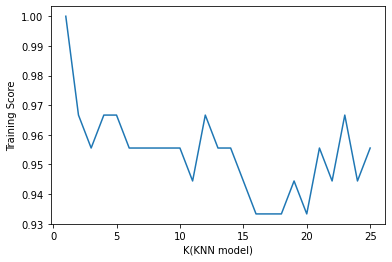

In [18]:
import matplotlib.pyplot as plt
# -*- utf-8 -*-
%matplotlib inline

plt.plot(k_range, score_train)
plt.xlabel('K(KNN model)')
plt.ylabel('Training Score')


Text(0, 0.5, 'Test Score')

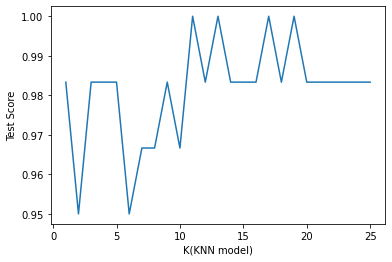

In [19]:
plt.plot(k_range, score_test)
plt.xlabel('K(KNN model)')
plt.ylabel('Test Score')